#  Customer Churn Prediction

# 1. Data Preprocessing:

In [1]:
#Load the provided dataset and perform initial data exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
excel_file_path = 'customer_churn_large_dataset.xlsx'
csv_file_path = 'df.csv'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(excel_file_path)

# Save the DataFrame as a CSV file
data.to_csv(csv_file_path, index=False) 


In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
#Handle missing data and outliers data.
data.isnull().sum()


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
data.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [8]:
#training and testing sets.
data.drop(['CustomerID', 'Name'], axis=1, inplace=True)
#assumed to be non-informative

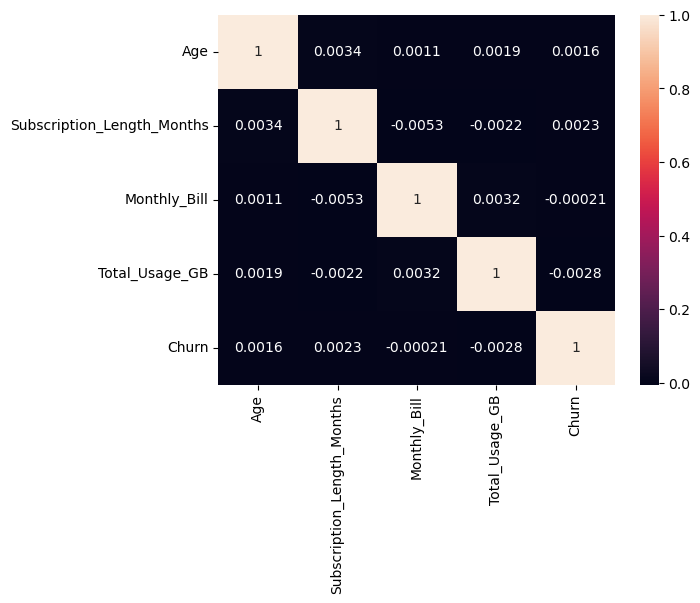

In [9]:
corr = data.corr()
sns.heatmap(corr,annot=True)

plt.show()

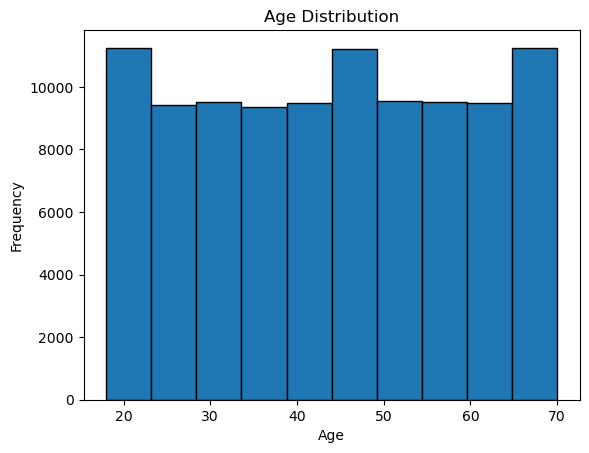

In [10]:
plt.hist(data['Age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#  Encode categorical variables

In [11]:
"""Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets."""
# Assuming 'data_encoded' is the DataFrame after preprocessing
distinct_locations = data['Location'].nunique()

print("Number of Distinct Locations:", distinct_locations)


Number of Distinct Locations: 5


C:\Users\SHRIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


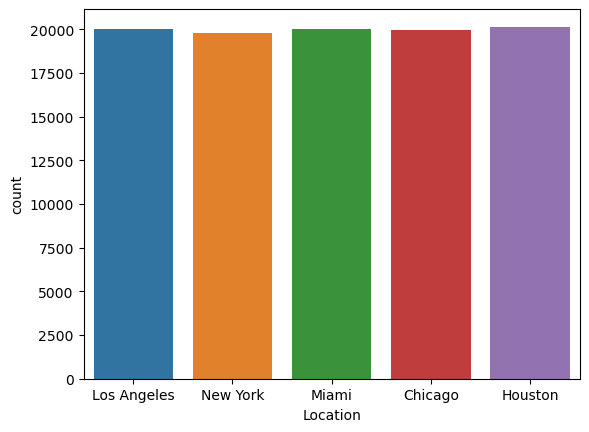

In [12]:
sns.countplot(data['Location'])
plt.show()

C:\Users\SHRIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


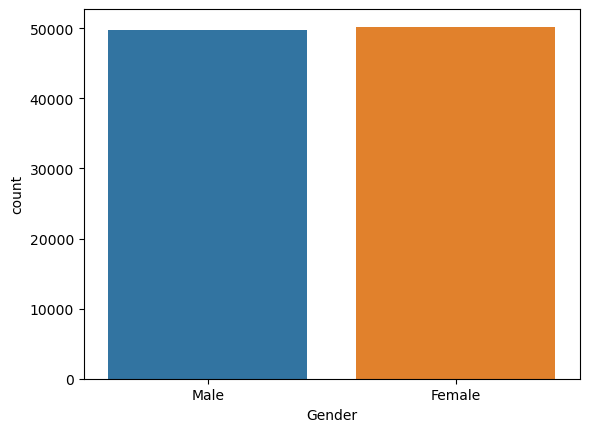

In [13]:
sns.countplot(data['Gender'])
plt.show()

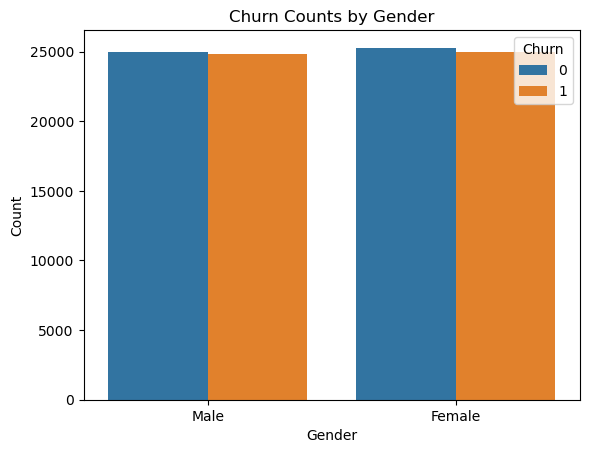

In [14]:

sns.countplot(x='Gender', hue='Churn', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Counts by Gender')
plt.show()


In [15]:
data = pd.get_dummies(data, columns=['Gender', 'Location'])

In [16]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


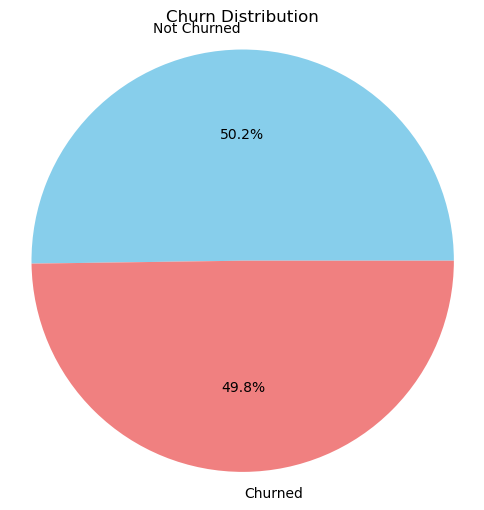

In [17]:
churn_counts = data['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Split the data into features (X) and target (y)


In [18]:
X = data.drop('Churn', axis=1)
y = data['Churn']


# Split the data into training and testing sets


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# 2. Feature Engineering:

In [20]:
X_train['Bill_Usage_Ratio'] = X_train['Monthly_Bill'] / X_train['Total_Usage_GB']
X_test['Bill_Usage_Ratio'] = X_test['Monthly_Bill'] / X_test['Total_Usage_GB']


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. Model Building:

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize and train the models
rf_model = RandomForestClassifier(random_state=50, n_estimators=100, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

gb_model = GradientBoostingClassifier(learning_rate= 0.01,random_state=42, n_estimators=100 ,max_depth=3)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test_scaled)
gb_preds = gb_model.predict(X_test_scaled)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)


Random Forest Accuracy: 0.4987
Gradient Boosting Accuracy: 0.5047


In [32]:
# Generate additional features
X_train['Bill_Age_Ratio'] = X_train['Monthly_Bill'] / X_train['Age']
X_test['Bill_Age_Ratio'] = X_test['Monthly_Bill'] / X_test['Age']

# Train and evaluate the models with the additional feature
rf_model_with_new_feature= RandomForestClassifier(random_state=50, n_estimators=100, max_depth=10)
rf_model_with_new_feature.fit(X_train_scaled, y_train)

gb_model_with_new_feature = GradientBoostingClassifier(learning_rate= 0.01,random_state=42, n_estimators=100, max_depth=3)
gb_model_with_new_feature.fit(X_train_scaled, y_train)

# Predict on the test set
rf_preds_with_new_feature = rf_model_with_new_feature.predict(X_test_scaled)
gb_preds_with_new_feature = gb_model_with_new_feature.predict(X_test_scaled)

# Evaluate the models
rf_accuracy_with_new_feature = accuracy_score(y_test, rf_preds_with_new_feature)
gb_accuracy_with_new_feature = accuracy_score(y_test, gb_preds_with_new_feature)

print("Random Forest Accuracy (with new feature):", rf_accuracy_with_new_feature)
print("Gradient Boosting Accuracy (with new feature):", gb_accuracy_with_new_feature)


Random Forest Accuracy (with new feature): 0.4987
Gradient Boosting Accuracy (with new feature): 0.5047


In [33]:
from sklearn.ensemble import VotingClassifier

# Combine models in a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model_with_new_feature),
    ('GradientBoosting', gb_model_with_new_feature)
], voting='hard')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_preds = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.5041


#  4. Model Optimzation

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],  
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=50), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [26]:
best_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

best_gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [30]:
gb_preds = best_gb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, gb_preds)
print(accuracy)

0.5047


# 5. Model Deployment

In [34]:
def predict_churn(input_data):
    # Preprocess input_data, apply feature scaling
    input_scaled = scaler.transform(input_data)
    
    # Make predictions
    predictions = ensemble_model.predict(input_scaled)
    
    return predictions

# Simulate new customer data
new_customer_data = pd.DataFrame({
    'Age': [35],
    'Subscription_Length_Months': [12],
    'Monthly_Bill': [60.0],
    'Total_Usage_GB': [300],
    'Gender_Female': [1],  # Simulate Female gender
    'Gender_Male': [0],
    'Bill_Usage_Ratio':[0],
    'Location_Los Angeles': [0],
    'Location_Miami': [1],
    'Location_Houston':[0],
    'Location_New York':[0],
    'Location_Chicago':[0]
    
})

# Predict churn for the new customer
new_customer_prediction = predict_churn(new_customer_data)
print("Churn Prediction for New Customer:", new_customer_prediction)


Churn Prediction for New Customer: [0]


C:\Users\SHRIYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
